In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/placement (1).csv')

In [ ]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='cgpa', ylabel='Density'>

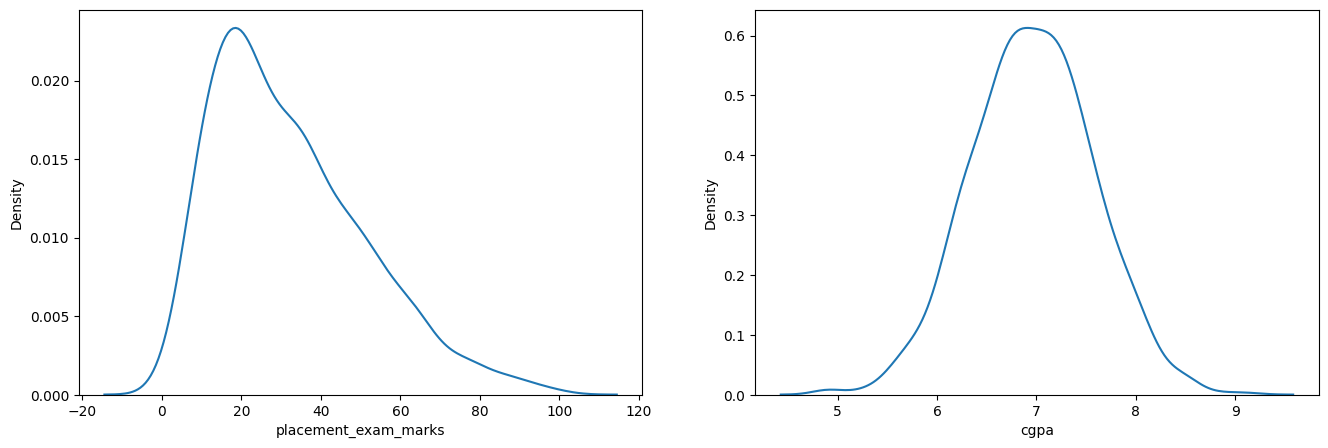

In [ ]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)

sns.kdeplot(df,x='placement_exam_marks') #right skewed -> boxplot


fig.add_subplot(1,2,2)
sns.kdeplot(df,x='cgpa') #normally distributed -> z score

In [ ]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [ ]:
df['cgpa'].skew()

-0.014529938929314918

<Axes: xlabel='placement_exam_marks'>

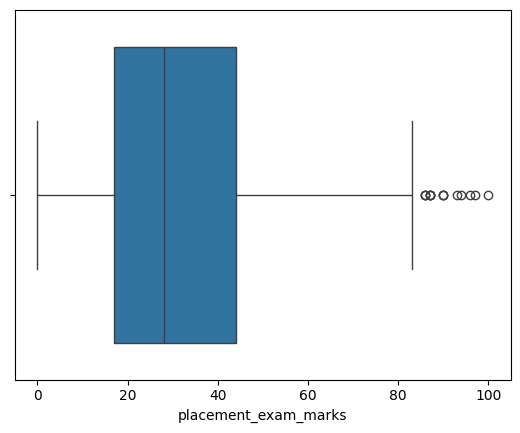

In [ ]:
sns.boxplot(df,x ='placement_exam_marks')

In [ ]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

upperbound = Q3 + 1.5*IQR

lowerbound = Q1 - 1.5*IQR

In [ ]:
q3 = df['placement_exam_marks'].quantile(0.75)
q3

44.0

In [ ]:
q1 = df['placement_exam_marks'].quantile(0.25)
q1

17.0

In [ ]:
IQR = q3 - q1
IQR

27.0

In [ ]:
upper_bound = q3 + 1.5*IQR
upper_bound

84.5

In [ ]:
lower_bound = q1 - 1.5*IQR
lower_bound

-23.5

In [ ]:
df[df['placement_exam_marks']<lower_bound]

,cgpa,placement_exam_marks,placed


In [ ]:
df[df['placement_exam_marks']>upper_bound]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


##Trimming

In [ ]:
new_df = df[(df['placement_exam_marks']< upper_bound) & (df['placement_exam_marks'] > lower_bound)]
new_df.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

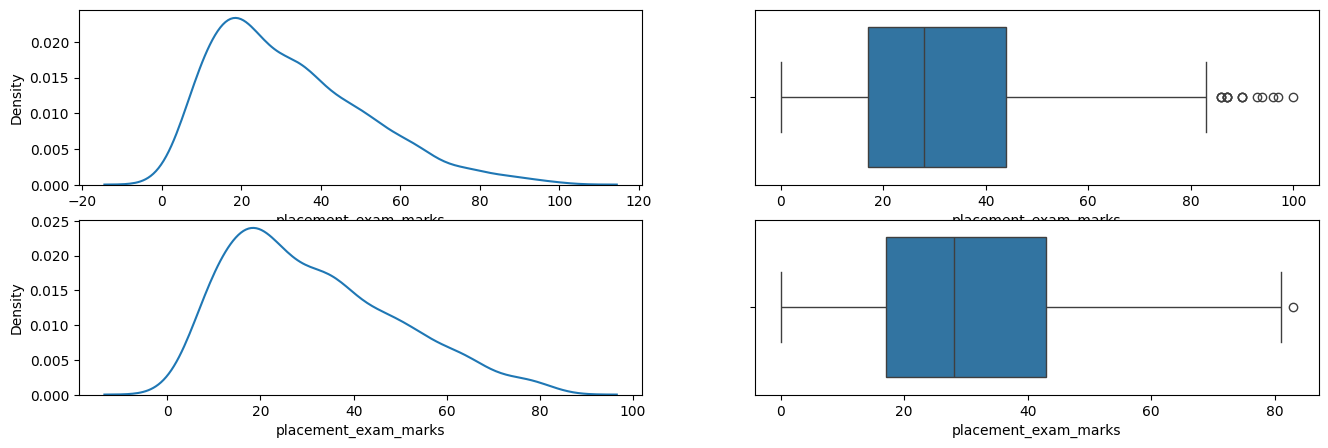

In [ ]:
fig = plt.figure(figsize=(16,5))
#before trimming
fig.add_subplot(2,2,1)
sns.kdeplot(df,x='placement_exam_marks')
fig.add_subplot(2,2,2)
sns.boxplot(df,x='placement_exam_marks')

#after trimming
fig.add_subplot(2,2,3)
sns.kdeplot(new_df,x='placement_exam_marks')
fig.add_subplot(2,2,4)
sns.boxplot(new_df,x='placement_exam_marks')

##Capping

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['placement_exam_marks'] = np.where(df_copy['placement_exam_marks']<lower_bound,lower_bound,df_copy['placement_exam_marks'])

In [ ]:
df_copy['placement_exam_marks'] = np.where(df_copy['placement_exam_marks']>upper_bound,upper_bound,df_copy['placement_exam_marks'])

In [ ]:
df_copy[df_copy['placement_exam_marks']>upper_bound]

,cgpa,placement_exam_marks,placed


In [ ]:
df_copy[df_copy['placement_exam_marks']<lower_bound]

,cgpa,placement_exam_marks,placed


<Axes: xlabel='placement_exam_marks'>

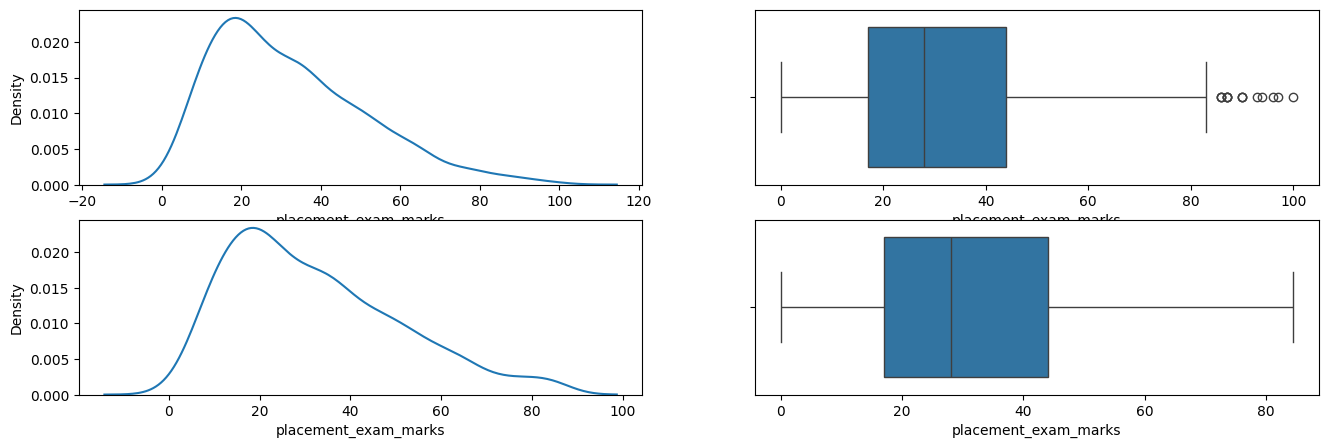

In [ ]:
fig = plt.figure(figsize=(16,5))
#before capping
fig.add_subplot(2,2,1)
sns.kdeplot(df,x='placement_exam_marks')
fig.add_subplot(2,2,2)
sns.boxplot(df,x='placement_exam_marks')

#after capping
fig.add_subplot(2,2,3)
sns.kdeplot(df_copy,x='placement_exam_marks')
fig.add_subplot(2,2,4)
sns.boxplot(df_copy,x='placement_exam_marks')